<a href="https://colab.research.google.com/github/Tanveer132/ML-Practices-End-to-End/blob/main/NeuralNetworks_ANN_Classification_Fashion_Datat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Networks - Artificial Neural Network

 ANN consists of 3 layers – Input, Hidden and Output. The input layer accepts the inputs, the hidden layer processes the inputs, and the output layer produces the result. Essentially, each layer tries to learn certain weights.

ANN can be used to solve problems related to:

    Tabular data
    Image data
    Text data


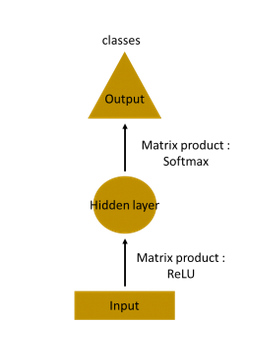

Activation Function :

    It is used to determine the output of neural network like yes or no. It maps the resulting values in between 0 to 1 or -1 to 1 etc. (depending upon the function).

The Activation Functions can be basically divided into 2 types-

1. Linear Activation Function 
2. Non-linear Activation Functions

Activation functions are a key part of neural network design.
The modern default activation function for hidden layers is the ReLU function.
The activation function for output layers depends on the type of prediction problem.

1. Activation Function for Hidden Layer :


    1. Rectified Linear Activation (ReLU)
    2. Logistic (Sigmoid)
    3. Hyperbolic Tangent (Tanh)

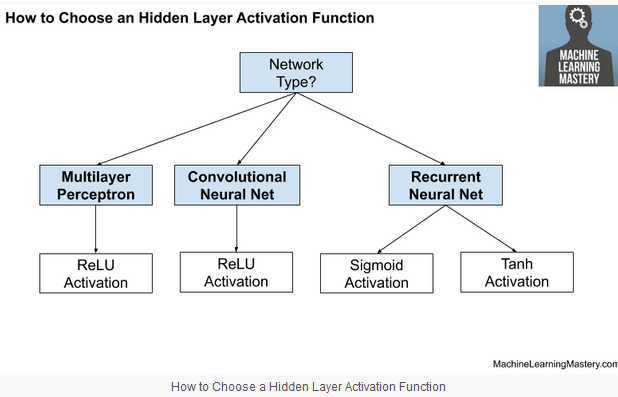

2. Activation Function for Output Layer :



    1. Linear
    2. Logistic (Sigmoid)
    3. Softmax

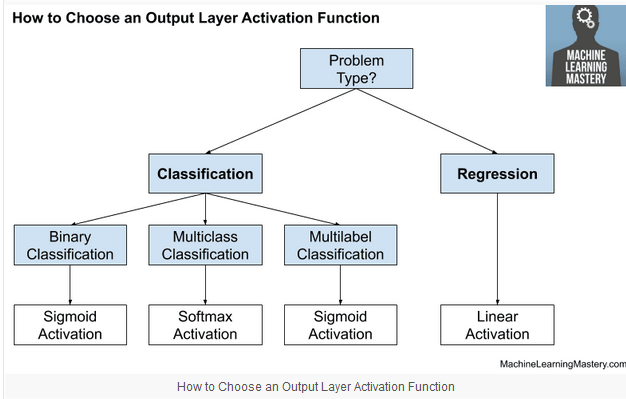

In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
data=tf.keras.datasets.fashion_mnist
(xtrain,ytrain),(xtest,ytest)=data.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
xtrain.shape,ytrain.shape

((60000, 28, 28), (60000,))

In [4]:
xtest.shape,ytest.shape

((10000, 28, 28), (10000,))

In [5]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [6]:
class_names=['T-shirt/top','Trouser','Pullovers','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

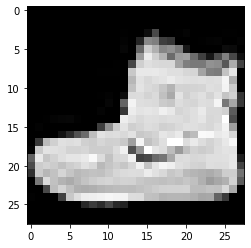

In [7]:
plt.imshow(xtrain[0],cmap='gray') #0-255

In [8]:
xtrain=xtrain/255.0
xtest=xtest/255.0

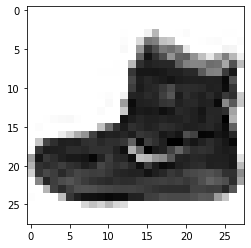

In [9]:
plt.imshow(xtrain[0],cmap=plt.cm.binary)

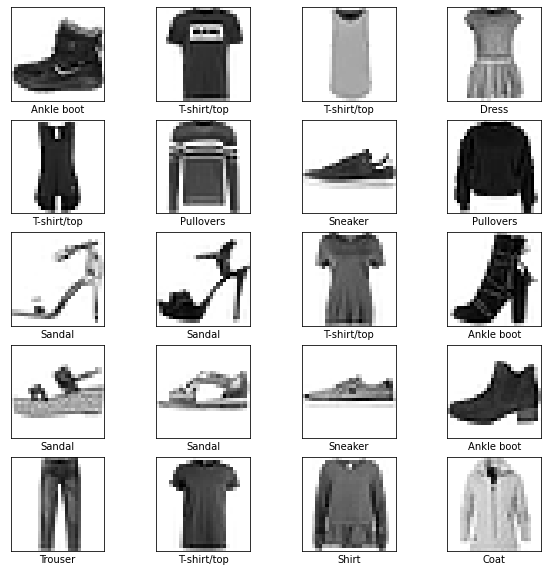

In [10]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(5,4,i+1)
  plt.imshow(xtrain[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[ytrain[i]])
  plt.xticks([])
  plt.yticks([])

In [11]:
#input layer 28X28 ->784

In [12]:
model=tf.keras.models.Sequential([
                      tf.keras.layers.Flatten(input_shape=(28,28)),
                      tf.keras.layers.Dense(128,activation='relu'),
                      tf.keras.layers.Dense(10)
])
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',metrics=['accuracy'])

In [13]:
model.fit(xtrain,ytrain,epochs=25)

Epoch 1/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4987 - accuracy: 0.8248
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3769 - accuracy: 0.8637
Epoch 3/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3366 - accuracy: 0.8779
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3141 - accuracy: 0.8846
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2931 - accuracy: 0.8912
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2811 - accuracy: 0.8964
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2682 - accuracy: 0.9002
Epoch 8/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2575 - accuracy: 0.9027
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2479 - accuracy: 0.9064
Epoch 10/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.238

In [14]:
train_loss,train_acc=model.evaluate(xtrain,ytrain)
print("Training accuracy is {} with Training Loss {}".format(train_acc,train_loss))

1875/1875 [==============================] - 3s 2ms/step - loss: 0.1412 - accuracy: 0.9471
Training accuracy is 0.9470999836921692 with Training Loss 0.14120988547801971


In [15]:
test_loss,test_acc=model.evaluate(xtest,ytest)
print("Training accuracy is {} with Training Loss {}".format(test_acc,test_loss))

313/313 [==============================] - 1s 2ms/step - loss: 0.3746 - accuracy: 0.8866
Training accuracy is 0.8866000175476074 with Training Loss 0.3745785355567932


In [16]:
#added one layer to convert logits or score of each neuron to probability
probability_model=tf.keras.Sequential([model,
                                       tf.keras.layers.Softmax()])

In [17]:
pred=probability_model.predict(xtest)

In [18]:
pred[0]

array([1.26991005e-11, 4.48711218e-13, 9.56833828e-16, 4.35795076e-17,
       2.08647482e-16, 3.53816336e-06, 2.79265407e-14, 1.45355728e-03,
       2.98371983e-12, 9.98542905e-01], dtype=float32)

In [19]:
np.argmax(pred[0]),class_names[np.argmax(pred[0])]

(9, 'Ankle boot')

In [20]:
ytest[0],class_names[ytest[0]]

(9, 'Ankle boot')

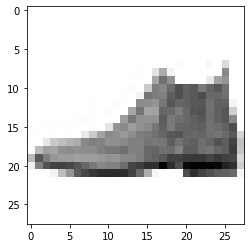

In [21]:
plt.imshow(xtest[0],cmap=plt.cm.binary)

In [22]:
#plot image with its label 
def plot_image(i,pred,xtest,ytest):
  img=xtest[i]
  actual=ytest[i]
  predicted=np.argmax(pred[i])
  plt.imshow(img,cmap=plt.cm.binary)
  plt.xticks([])
  plt.yticks([])
  if actual==predicted:
    color='g'
  else:
    color='r'
  plt.xlabel("{} with prob {:.2f}%".format(class_names[predicted],100*np.max(pred[i])),color=color)

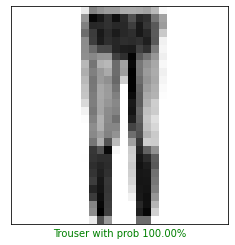

In [23]:
plot_image(3,pred,xtest,ytest)

In [24]:
def plot_prob(i,pred,ytest):
  predicted=np.argmax(pred[i])
  actual=ytest[i]
  bplot=plt.bar(range(10),pred[i],color='y')
  plt.xticks(range(10))
  plt.yticks([])
  bplot[predicted].set_color('r')
  bplot[actual].set_color('g')

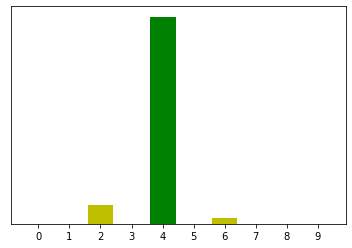

In [25]:
plot_prob(10,pred,ytest)

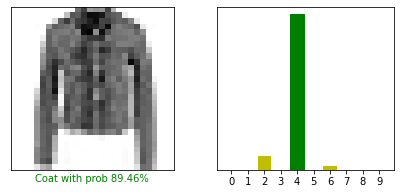

In [26]:
plt.figure(figsize=(7,3))
plt.subplot(1,2,1)
plot_image(10,pred,xtest,ytest)
plt.subplot(1,2,2)
plot_prob(10,pred,ytest)

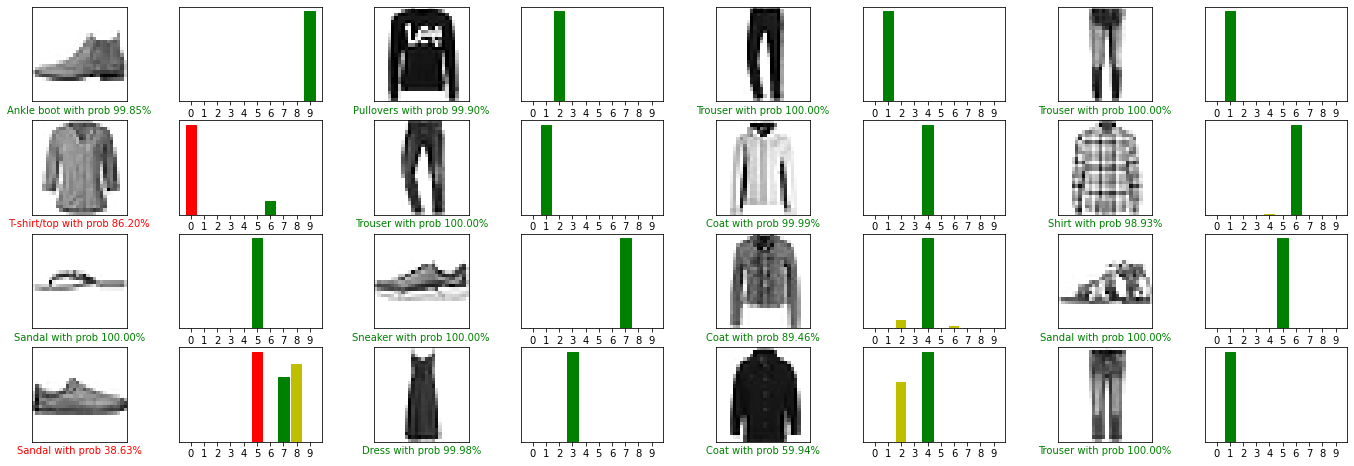

In [27]:
r=4
c=4
n=r*c
plt.figure(figsize=(3*2*c,2*r))
for i in range(n):
  plt.subplot(r,2*c,2*i+1)
  plot_image(i,pred,xtest,ytest)
  plt.subplot(r,2*c,2*i+2)
  plot_prob(i,pred,ytest)